In [3]:
import numpy as np
import pandas as pd
import pylab as plt
pd.set_option('display.max_columns', 1000)
%matplotlib inline
from matplotlib import rcParams

%matplotlib inline 
rcParams['figure.figsize'] = 15,6
#plt.style.use('ggplot')

In [4]:
def feature_analysis(clf, X, y, indice, bins=10, proba=True, reg_bin=0):
    """
    clf: scikit learn model
    X: features
    y: target
    indice: feature to analyze
    bins: the number of equal-width bins in the feature space
    proba: use predict_proba, (True by default, False if reg_bin>0).
    reg_bin: the number of equal-width bins in the target space (for regression)
    """
    if bins > 0:
        h, edges = np.histogram(X[:, indice], bins=bins)
        # generating full dataset
        allX = []
        ally = []
        for edge in edges:
            nX = X.copy()
            nX[:, indice] = edge
            allX.append(nX)
            ally.append(y)
        pX, py = np.concatenate(allX), np.concatenate(ally)
    elif bins < 0:
        h, edges = np.histogram(X[:, indice], bins=-bins)
        pX = X.copy()
        py = y.copy()
        dg = np.digitize(pX[:, indice], edges, right=True)
        pX[:, indice] = edges[dg]
    else:
        pX = X
        py = y
    if reg_bin > 0:
        h, edges = np.histogram(y, bins=reg_bin)
        py = edges[np.digitize(py, edges, right=True)]
        proba = False
    if proba:
        ppred = clf.predict_proba(pX)
        pdf = pd.DataFrame(ppred)
        pdf.columns = map(lambda x: "class=" + str(x), list(pdf.columns))
    else:
        ppred = clf.predict(pX)
        pdf = pd.DataFrame(ppred)
        pdf.columns = ["ypred"]
    feature_names = list(pdf.columns)
    pdf["feature_value"] = pX[:, indice]
    pdf["target"] = py
    return pdf.groupby("feature_value").mean(), feature_names

In [5]:
def feature_analysis_nd(clf, X, y, indices, bins=10, proba=True, reg_bin=0):
    """
    clf: scikit learn model
    X: features
    y: target
    indice1: feature to analyze
    indice2: feature to analyze
    bins: the number of equal-width bins in the feature space
    proba: use predict_proba, (True by default, False if reg_bin>0).
    reg_bin: the number of equal-width bins in the target space (for regression)
    """
    pX = X.copy()
    py = y.copy()
    for indice in indices:
        h, edges = np.histogram(X[:, indice], bins=bins)
        dg = np.digitize(pX[:, indice], edges, right=True)
        pX[:, indice] = edges[dg]
    if reg_bin > 0:
        h, edges = np.histogram(y, bins=reg_bin)
        py = edges[np.digitize(py, edges, right=True)]
        proba = False
    if proba:
        ppred = clf.predict_proba(pX)
        pdf = pd.DataFrame(ppred)
        pdf.columns = map(lambda x: "class=" + str(x), list(pdf.columns))
    else:
        ppred = clf.predict(pX)
        pdf = pd.DataFrame(ppred)
        pdf.columns = ["ypred"]
    feature_names = list(pdf.columns)
    indices_names = []
    for indice in indices:
        pdf["feature_value_%d" %indice] = pX[:, indice]
        indices_names.append("feature_value_%d" %indice)
    pdf["target"] = py
    return pdf.groupby(indices_names).mean(), feature_names

## Regression: testing diabete dataset

In [6]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [15]:
data = datasets.load_diabetes()

In [16]:
X, y = data.data, data.target

In [17]:
clf = RandomForestRegressor(max_depth=10, n_estimators=100)

In [18]:
clf.fit(X, y)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)

In [19]:
np.argsort(clf.feature_importances_)[::-1]

array([8, 2, 3, 9, 0, 5, 6, 4, 7, 1])

#### Feature 8

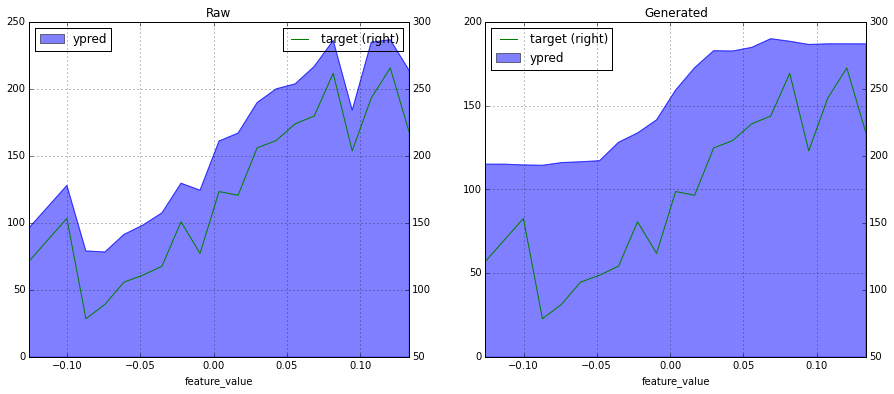

In [20]:
st = False
fig, axes = plt.subplots(nrows=1, ncols=2)
pdf1, n = feature_analysis(clf, X, y, 8, bins=-20, reg_bin=10)
pdf1[n].plot(kind="area", stacked=st, ax=axes[0], title="Raw")
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[0])
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[1])
pdf2, n = feature_analysis(clf, X, y, 8, bins=20, reg_bin=10)
pdf2[n].plot(kind="area", stacked=st, ax=axes[1], title="Generated")

Feature 2

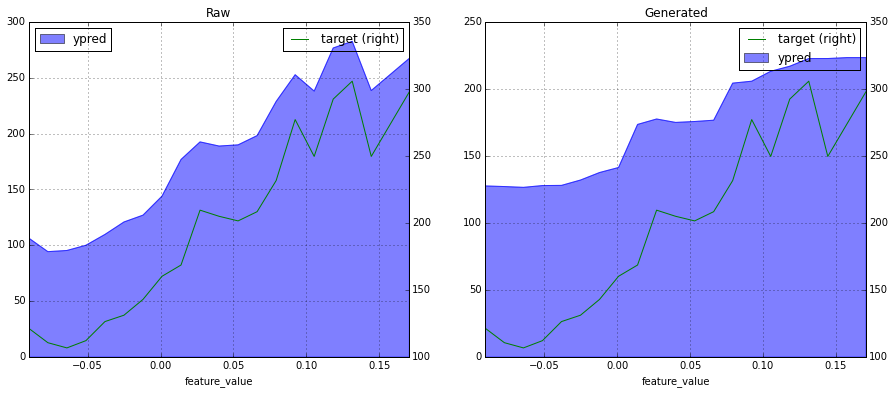

In [21]:
st = False
fig, axes = plt.subplots(nrows=1, ncols=2)
pdf1, n = feature_analysis(clf, X, y, 2, bins=-20, reg_bin=10)
pdf1[n].plot(kind="area", stacked=st, ax=axes[0], title="Raw")
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[0])
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[1])
pdf2, n = feature_analysis(clf, X, y, 2, bins=20, reg_bin=10)
pdf2[n].plot(kind="area", stacked=st, ax=axes[1], title="Generated")

### Classification: testing iris dataset

In [22]:
data = datasets.load_iris()

In [23]:
X, y = data.data, data.target

In [24]:
X = X[:, 1:]

In [25]:
clf = RandomForestClassifier(max_depth=10, n_estimators=100)

In [26]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [27]:
np.argsort(clf.feature_importances_)[::-1]

array([2, 1, 0])

Feature 2

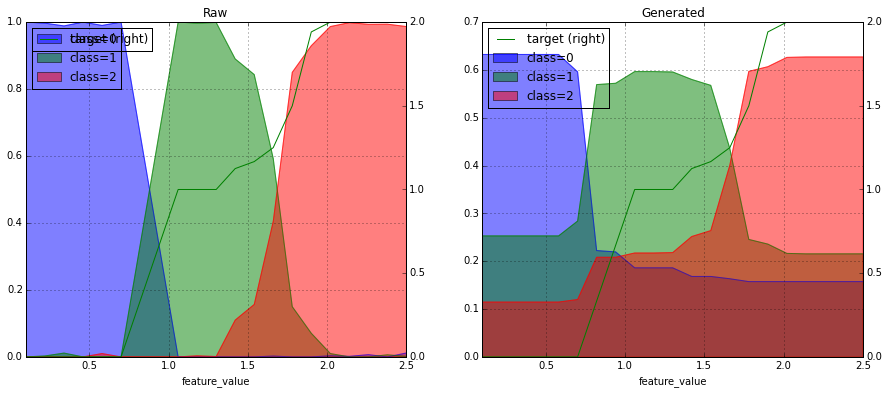

In [28]:
st = False
fig, axes = plt.subplots(nrows=1, ncols=2)
pdf1, n = feature_analysis(clf, X, y, 2, bins=-20)
pdf1[n].plot(kind="area", stacked=st, ax=axes[0], title="Raw")
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[0])
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[1])
pdf2, n = feature_analysis(clf, X, y, 2, bins=20)
pdf2[n].plot(kind="area", stacked=st, ax=axes[1], title="Generated")

In [29]:
X

array([[ 3.5,  1.4,  0.2],
       [ 3. ,  1.4,  0.2],
       [ 3.2,  1.3,  0.2],
       [ 3.1,  1.5,  0.2],
       [ 3.6,  1.4,  0.2],
       [ 3.9,  1.7,  0.4],
       [ 3.4,  1.4,  0.3],
       [ 3.4,  1.5,  0.2],
       [ 2.9,  1.4,  0.2],
       [ 3.1,  1.5,  0.1],
       [ 3.7,  1.5,  0.2],
       [ 3.4,  1.6,  0.2],
       [ 3. ,  1.4,  0.1],
       [ 3. ,  1.1,  0.1],
       [ 4. ,  1.2,  0.2],
       [ 4.4,  1.5,  0.4],
       [ 3.9,  1.3,  0.4],
       [ 3.5,  1.4,  0.3],
       [ 3.8,  1.7,  0.3],
       [ 3.8,  1.5,  0.3],
       [ 3.4,  1.7,  0.2],
       [ 3.7,  1.5,  0.4],
       [ 3.6,  1. ,  0.2],
       [ 3.3,  1.7,  0.5],
       [ 3.4,  1.9,  0.2],
       [ 3. ,  1.6,  0.2],
       [ 3.4,  1.6,  0.4],
       [ 3.5,  1.5,  0.2],
       [ 3.4,  1.4,  0.2],
       [ 3.2,  1.6,  0.2],
       [ 3.1,  1.6,  0.2],
       [ 3.4,  1.5,  0.4],
       [ 4.1,  1.5,  0.1],
       [ 4.2,  1.4,  0.2],
       [ 3.1,  1.5,  0.1],
       [ 3.2,  1.2,  0.2],
       [ 3.5,  1.3,  0.2],
 

### Binary classification: testing hastie dataset

In [7]:
X, y = datasets.make_hastie_10_2(n_samples=20000)

In [8]:
clf = RandomForestClassifier(max_depth=10, n_estimators=100)

In [9]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [10]:
np.argsort(clf.feature_importances_)[::-1]

array([9, 5, 2, 0, 3, 7, 6, 4, 8, 1])

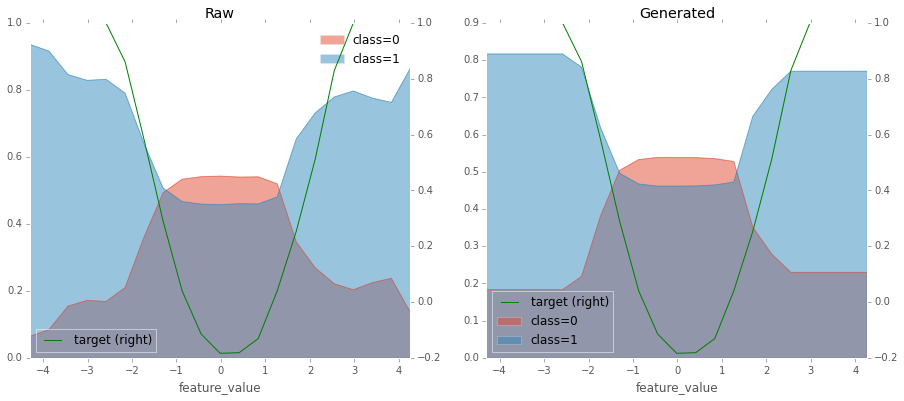

In [442]:
st = False
feature_no = 9
fig, axes = plt.subplots(nrows=1, ncols=2)
pdf1, n = feature_analysis(clf, X, y, feature_no, bins=-20)
pdf1[n].plot(kind="area", stacked=st, ax=axes[0], title="Raw")
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[0])
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[1])
pdf2, n = feature_analysis(clf, X, y, feature_no, bins=20)
pdf2[n].plot(kind="area", stacked=st, ax=axes[1], title="Generated")

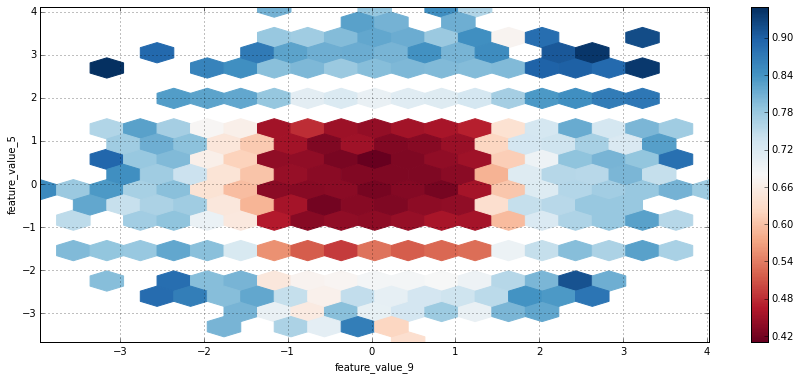

In [48]:
st = False
feature_no = [9, 5]
pdf, n = feature_analysis_nd(clf, X, y, feature_no, bins=20)
pdf.reset_index(inplace=True)
pdf.plot(kind="hexbin", x="feature_value_9", y="feature_value_5", C="class=1", gridsize=20, cmap=plt.cm.RdBu)

as regressor...

In [449]:
clf = RandomForestRegressor(max_depth=10, n_estimators=120)

In [450]:
clf.fit(X, y)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=120, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)

In [451]:
np.argsort(clf.feature_importances_)[::-1]

array([9, 8, 7, 2, 4, 5, 3, 0, 1, 6])

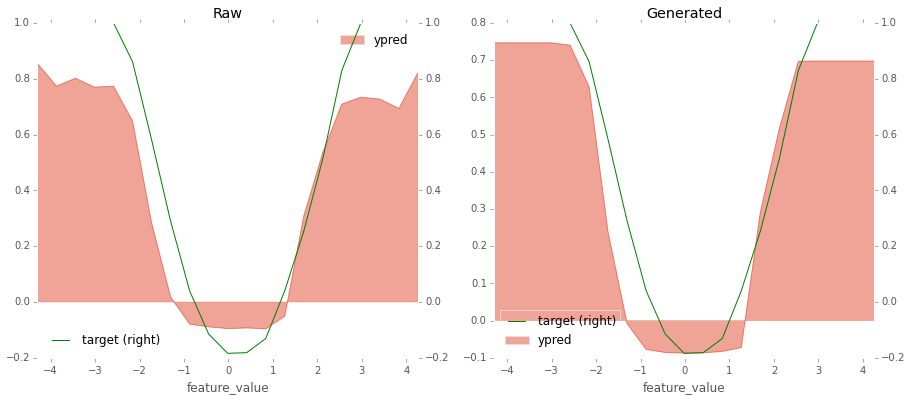

In [452]:
st = False
feature_no = 9
fig, axes = plt.subplots(nrows=1, ncols=2)
pdf1, n = feature_analysis(clf, X, y, feature_no, bins=-20, reg_bin=10)
pdf1[n].plot(kind="area", stacked=st, ax=axes[0], title="Raw")
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[0])
pdf1[["target"]].plot(secondary_y=True, style='g', ax=axes[1])
pdf2, n = feature_analysis(clf, X, y, feature_no, bins=20, reg_bin=10)
pdf2[n].plot(kind="area", stacked=st, ax=axes[1], title="Generated")

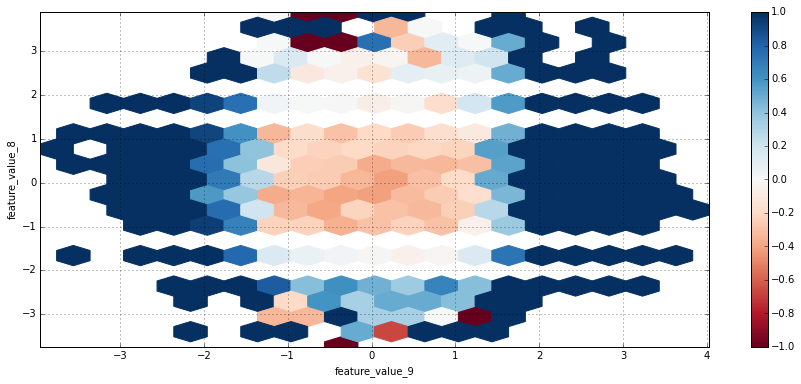

In [47]:
st = False
feature_no = [9, 8]
pdf, n = feature_analysis_nd(clf, X, y, feature_no, bins=20, reg_bin=10)
pdf.reset_index(inplace=True)
pdf.plot(kind="hexbin", x="feature_value_9", y="feature_value_8", C="ypred", gridsize=20, cmap=plt.cm.RdBu)